<a href="https://colab.research.google.com/github/LAGISHETTYNANDITHA/2203A52097/blob/main/tomato_leaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/tomato/train'
valid_path = '/content/drive/MyDrive/tomato/valid'

In [ ]:

# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:

  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/tomato/train/*')

In [ ]:

# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/tomato/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 51 images belonging to 10 classes.


In [ ]:

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/tomato/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 51 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-15-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 48s 34s/step - loss: 6.7133 - accuracy: 0.0980 - val_loss: 7.5188 - val_accuracy: 0.1176
Epoch 2/50
2/2 [==============================] - 30s 26s/step - loss: 6.2027 - accuracy: 0.0784 - val_loss: 7.4042 - val_accuracy: 0.1176
Epoch 3/50
2/2 [==============================] - 30s 26s/step - loss: 7.3330 - accuracy: 0.1176 - val_loss: 6.4005 - val_accuracy: 0.2549
Epoch 4/50
2/2 [==============================] - 33s 24s/step - loss: 6.4565 - accuracy: 0.1961 - val_loss: 6.3013 - val_accuracy: 0.2157
Epoch 5/50
2/2 [==============================] - 21s 17s/step - loss: 6.4745 - accuracy: 0.1765 - val_loss: 5.1378 - val_accuracy: 0.2549
Epoch 6/50
2/2 [==============================] - 22s 15s/step - loss: 5.8429 - accuracy: 0.1373 - val_loss: 3.4942 - val_accuracy: 0.2549
Epoch 7/50
2/2 [==============================] - 25s 19s/step - loss: 2.7764 - accuracy: 0.2353 - val_loss: 2.8568 - val_accuracy: 0.1961
Epoch 8/50
2/2 [===========

In [ ]:

img=image.load_img('/content/drive/MyDrive/tomato/train/Tomato___Bacterial_spot/00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[172., 166., 166.],
        [170., 164., 164.],
        [174., 168., 168.],
        ...,
        [115., 105., 106.],
        [126., 116., 117.],
        [137., 127., 128.]],

       [[173., 167., 167.],
        [168., 162., 162.],
        [169., 163., 163.],
        ...,
        [142., 132., 133.],
        [155., 145., 146.],
        [142., 132., 133.]],

       [[178., 172., 172.],
        [170., 164., 164.],
        [168., 162., 162.],
        ...,
        [119., 109., 110.],
        [129., 119., 120.],
        [146., 136., 137.]],

       ...,

       [[167., 157., 158.],
        [164., 154., 155.],
        [166., 156., 157.],
        ...,
        [112., 100., 100.],
        [132., 120., 120.],
        [107.,  95.,  95.]],

       [[164., 154., 155.],
        [159., 149., 150.],
        [161., 151., 152.],
        ...,
        [118., 106., 106.],
        [126., 114., 114.],
        [113., 101., 101.]],

       [[166., 156., 157.],
        [162., 152., 153.],
        [168., 1

In [ ]:

x.shape

(224, 224, 3)

In [ ]:

x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape


(1, 224, 224, 3)

In [ ]:

model.predict(img_data)

1/1 [==============================] - 3s 3s/step


array([[1.7446713e-05, 2.2625500e-04, 1.5949670e-03, 1.1872710e-05,
        6.2659162e-04, 3.6635834e-07, 2.0182519e-03, 3.2105163e-06,
        9.9541241e-01, 8.8618610e-05]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 239ms/step


In [ ]:

import tensorflow as tf

In [ ]:

tf.__version__

'2.15.0'

In [ ]:

# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

y_pred = model.predict(test_set)

2/2 [==============================] - 14s 6s/step


In [ ]:

y_pred

array([[1.86251387e-01, 1.14549227e-01, 2.18059969e-04, 6.86535835e-02,
        1.07048647e-02, 5.45968898e-02, 7.63724139e-03, 2.05588385e-01,
        3.09661597e-01, 4.21388224e-02],
       [1.88746455e-03, 8.63638893e-02, 8.61150492e-03, 3.08201090e-02,
        4.50350612e-01, 4.71360385e-02, 1.20856203e-01, 2.00260267e-01,
        5.36826812e-02, 3.13356068e-05],
       [2.10108760e-06, 1.33928377e-03, 8.87850393e-03, 1.95850385e-03,
        1.03226081e-02, 7.84055889e-03, 9.65338349e-01, 2.84955197e-04,
        4.03496157e-03, 1.41680587e-07],
       [1.44271597e-01, 1.39045399e-02, 9.76780429e-05, 2.05029100e-02,
        8.13227613e-04, 6.68373005e-03, 3.72912968e-04, 3.94953927e-03,
        1.83270555e-02, 7.91076779e-01],
       [4.32827474e-05, 5.60495490e-03, 5.38524648e-04, 1.01489190e-03,
        9.22637403e-01, 9.42951534e-04, 6.23712540e-02, 1.77893217e-03,
        5.06347185e-03, 4.19986964e-06],
       [4.09902282e-15, 9.03821046e-11, 9.99962986e-01, 4.56082290e-11,
   

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:

y_pred

array([8, 4, 6, 9, 4, 2, 6, 8, 0, 5, 0, 9, 7, 6, 5, 3, 2, 0, 8, 1, 4, 6,
       1, 9, 9, 3, 0, 8, 7, 5, 0, 4, 3, 6, 1, 7, 0, 6, 9, 0, 2, 0, 8, 0,
       0, 0, 1, 2, 4, 2, 8])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:

model=load_model('model_resnet50.h5')

In [ ]:

img_data

array([[[[-103.288025, -116.12802 , -123.00549 ],
         [-103.29587 , -116.135864, -123.013336],
         [-103.28018 , -116.12018 , -122.99765 ],
         ...,
         [-103.523315, -116.36723 , -123.22902 ],
         [-103.48018 , -116.3241  , -123.18588 ],
         [-103.43704 , -116.28096 , -123.142746]],

        [[-103.2841  , -116.1241  , -123.00157 ],
         [-103.30371 , -116.14371 , -123.02118 ],
         [-103.29979 , -116.139786, -123.01726 ],
         ...,
         [-103.417435, -116.26135 , -123.12314 ],
         [-103.366455, -116.21037 , -123.07216 ],
         [-103.417435, -116.26135 , -123.12314 ]],

        [[-103.264496, -116.10449 , -122.981964],
         [-103.29587 , -116.135864, -123.013336],
         [-103.30371 , -116.14371 , -123.02118 ],
         ...,
         [-103.50763 , -116.35155 , -123.21333 ],
         [-103.468414, -116.31233 , -123.17412 ],
         [-103.40175 , -116.24567 , -123.10745 ]],

        ...,

        [[-103.3194  , -116.163315, -1

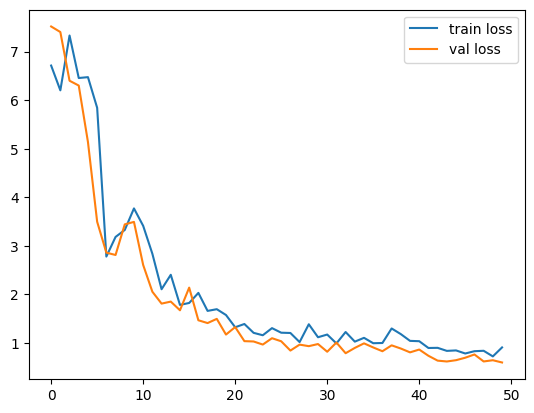

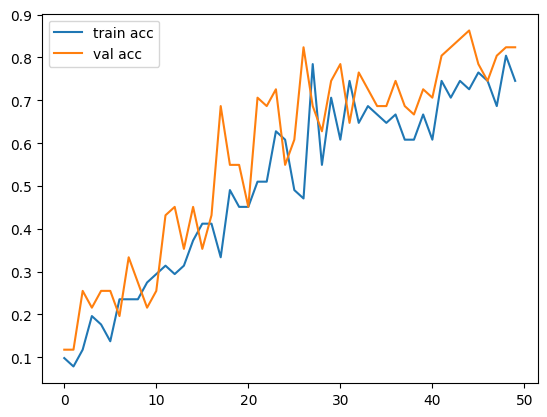

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import os
import re
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, preprocessing, model_selection, metrics, base
import tensorflow as tf
import cv2

In [ ]:
path = r"/content/drive/MyDrive/tomato/train"

images, labels = [], []

for file in sorted(os.listdir(path)):
    if file.endswith(".jpg") or file.endswith("jpeg"):
        img = cv2.cvtColor(cv2.resize(cv2.imread(os.path.join(path, file)), (128, 128)), cv2.COLOR_BGR2RGB)
        images.append(img)
        if "Early_blight" in file:
            file = file.replace("Early_blight", "Early_blight")
        elif "Leaf_Mold" in file:
            file = file.replace("Leaf_Mold", "Leaf_Mold")
        elif "Target_spot" in file:
            file = file.replace("Target_spot", "Target_spot")
        labels.append(re.findall("[a-zA-Z]+", file)[0])

path = r"/content/drive/MyDrive/tomato/valid"

for file in sorted(os.listdir(path)):
    if file.endswith(".jpg") or file.endswith(".jpeg"):
        img = cv2.cvtColor(cv2.resize(cv2.imread(os.path.join(path, file)), (128, 128)), cv2.COLOR_BGR2RGB)
        images.append(img)
        labels.append(re.findall("[a-zA-Z]+", file)[0])

images = np.array(images)
labels = np.array(labels)

In [ ]:
print(images.shape, labels.shape)

(0,) (0,)


In [ ]:
class_names = np.unique(labels)

class_map = {i : class_name for i, class_name in enumerate(class_names)}
reverse_class_map = {val : key for key, val in class_map.items()}

print(class_map)

{}


In [ ]:
X = images.copy()
y = np.array([reverse_class_map[label] for label in labels.copy()])

In [ ]:
def visualize():
    plt.figure(figsize = (12, 12))
    for i in range(9):
        img, label = X[i], y[i]
        plt.subplot(3, 3, i + 1)
        plt.title(class_map[label])
        plt.imshow(img)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomTranslation(0.1, 0.1)
])

In [ ]:
max_total = 500
X_new, y_new = [], []
X_cls_array = [X[y == i] for i in class_map.keys()]

for label, X_set in zip(class_map.keys(), X_cls_array):
    count = 0
    while count < max_total - label_counts[label]:
        for img in X_set:
            augmented_img = data_augmentation(np.expand_dims(img, axis = 0))
            X_new.append(augmented_img[0])
            y_new.append(label)
            count += 1
            if count >= max_total - label_counts[label]:
                break

X_new, y_new = np.array(X_new), np.array(y_new)
print(X_new.shape, y_new.shape)

(0,) (0,)


In [ ]:
X = np.concatenate([X, X_new])
y = np.concatenate([y, y_new])

print(X.shape, y.shape)

print(pd.Series(y).value_counts())

(0,) (0,)
Series([], Name: count, dtype: int64)
